In [ ]:
import cv2
import os

In [ ]:
data_path = "/content/drive/MyDrive/Deep_Learning/brain_tumor_dataset"

In [ ]:
categories = os.listdir(data_path)
categories

['no', 'yes']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = [i for i in range(len(categories))]
labels

[0, 1]

In [ ]:
label_dict = dict(zip(categories,labels))

In [ ]:
img_size = 100
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path,category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    img = cv2.imread(img_path)

    try:
      gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized = cv2.resize(gray,(img_size,img_size))
      data.append(resized)
      target.append(label_dict[category])

    except Exception as e:
      print("Exception",e)

      cv2.imwrite(img_path,img)

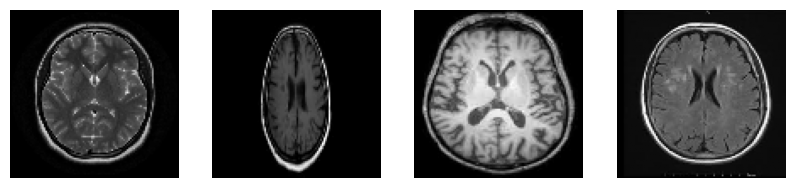

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(data[i], cmap="gray")
  plt.axis("off")
plt.show()

In [ ]:
import numpy as np
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)


In [ ]:
data
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# from tensorflow.keras.utils import to_categorical
# new_target = to_categorical(target)
# new_target

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [ ]:
train_data.shape

(227, 100, 100, 1)

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model.fit(train_data,train_target,epochs=10,validation_split = 0.2)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.5635 - loss: 0.6933 - val_accuracy: 0.8261 - val_loss: 0.5072
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.7961 - loss: 0.4981 - val_accuracy: 0.4348 - val_loss: 0.9795
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.7217 - loss: 0.5766 - val_accuracy: 0.8478 - val_loss: 0.4275
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.7944 - loss: 0.4617 - val_accuracy: 0.7826 - val_loss: 0.5181
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8149 - loss: 0.4514 - val_accuracy: 0.8043 - val_loss: 0.4220
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7864 - loss: 0.4352 - val_accuracy: 0.8261 - val_loss: 0.3876
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.8178 - loss: 0.3611 - val_accuracy: 0.8696 - val_loss: 0.3804
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8758 - loss: 0.3046 - val_accuracy: 0.8696 - val_loss: 0.3266
Epoch 9/

In [ ]:
y_predicted = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
# y_predicted

In [ ]:
y_predicted = np.argmax(y_predicted,axis=1)
y_predicted

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
from  skimage.transform import resize
from skimage.io import imread
img=imread("/content/drive/MyDrive/Deep_Learning/brain_tumor_dataset/no/12 no.jpg")
img.shape
img_resize=resize(img,(100,100,1))
img_resize.shape
img_reshape=img_resize.reshape(1,100,100,1)
img_reshape.shape
predict=model.predict(img_reshape)
categories[predict.argmax()]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


'no'